In [2]:
import nx as nx
import torch
import torch.nn as nn
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
from torchvision import transforms
import glob
import re
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import scipy.io
import random


hum = scipy.io.loadmat('turkResults_CogSci2016.mat')
humMat = hum['simMatrix']

Using cache found in C:\Users\tonyyyyy/.cache\torch\hub\pytorch_vision_v0.10.0
Using cache found in C:\Users\tonyyyyy/.cache\torch\hub\pytorch_vision_v0.10.0


In [3]:
model.classifier = nn.Sequential(*list(model.classifier.children())[:-1])

In [4]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [5]:
data = {}
name=[]
path = "images/*.png"

for file in glob.glob(path):
    temp1=image.load_img(file)
    temp2=re.findall(r'\d+', file)
    name.append(int(temp2[0]))
    data.update({int(temp2[0]) : temp1})

print(len(name))

mapping = {}

120


In [6]:
for i in range(120):
  input_tensor = preprocess(data[name[i]])
  input_batch = input_tensor.unsqueeze(0)
  feature = model(input_batch)
  mapping.update({name[i] : feature})

In [7]:
name.sort()
li = []
for i in range(120):
  li.append(mapping[name[i]].cpu().detach().numpy())

F = np.asarray(li)
F = np.reshape(F, (120,4096))
print(F)

Mat = F.dot(F.transpose())
OrigSimMat = Mat
Mat = np.reshape(Mat, (14400))
print(Mat)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.68505955]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 3.0960639  0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[2167.3582   572.5261   287.106   ...  768.16     185.90198 2402.2769 ]


In [8]:
import networkx as nx
import pandas as pd
G=nx.Graph()
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

In [9]:
OrigSimMat = np.array(OrigSimMat)

SimMat = OrigSimMat - np.min(OrigSimMat)
SimMat = SimMat/(np.max(SimMat))*10
SimMat

array([[2.5778527 , 0.6343162 , 0.28649   , ..., 0.7737383 , 0.3074313 ,
        0.53355575],
       [0.6343162 , 3.2588818 , 0.49965248, ..., 0.7515001 , 0.37549472,
        0.35714462],
       [0.28649   , 0.49965248, 6.670106  , ..., 0.22397666, 0.9894261 ,
        0.44962034],
       ...,
       [0.7737383 , 0.7515001 , 0.22397666, ..., 8.213838  , 0.6858046 ,
        0.8727248 ],
       [0.3074313 , 0.37549472, 0.9894261 , ..., 0.6858046 , 9.086538  ,
        0.16315809],
       [0.53355575, 0.35714462, 0.44962034, ..., 0.8727248 , 0.16315809,
        2.8641355 ]], dtype=float32)

In [10]:
df = pd.DataFrame(columns = name,index=name,data=humMat)
corr_data = []
for i in range(0,120):
    for j in range(0,i):
        index = df.index[i]
        col = df.columns[j]
        tmp = [index,col,df[index][col]]
        corr_data.append(tmp)

In [11]:
G=nx.Graph()

existing_edges = {}
existing_nodes = {}

def build_graph_for_all():
    count=0
    for d in corr_data:
        if  d[0] not in existing_edges :
             G.add_node(str(d[0]))
        if  d[1] not in existing_edges :
             G.add_node(str(d[1]))
        G.add_weighted_edges_from([[str(d[0]), str(d[1]),d[2]]])
        count=count + 1

build_graph_for_all()

pos = nx.spring_layout(G,weight='weight')
#plt.savefig("path1.png")

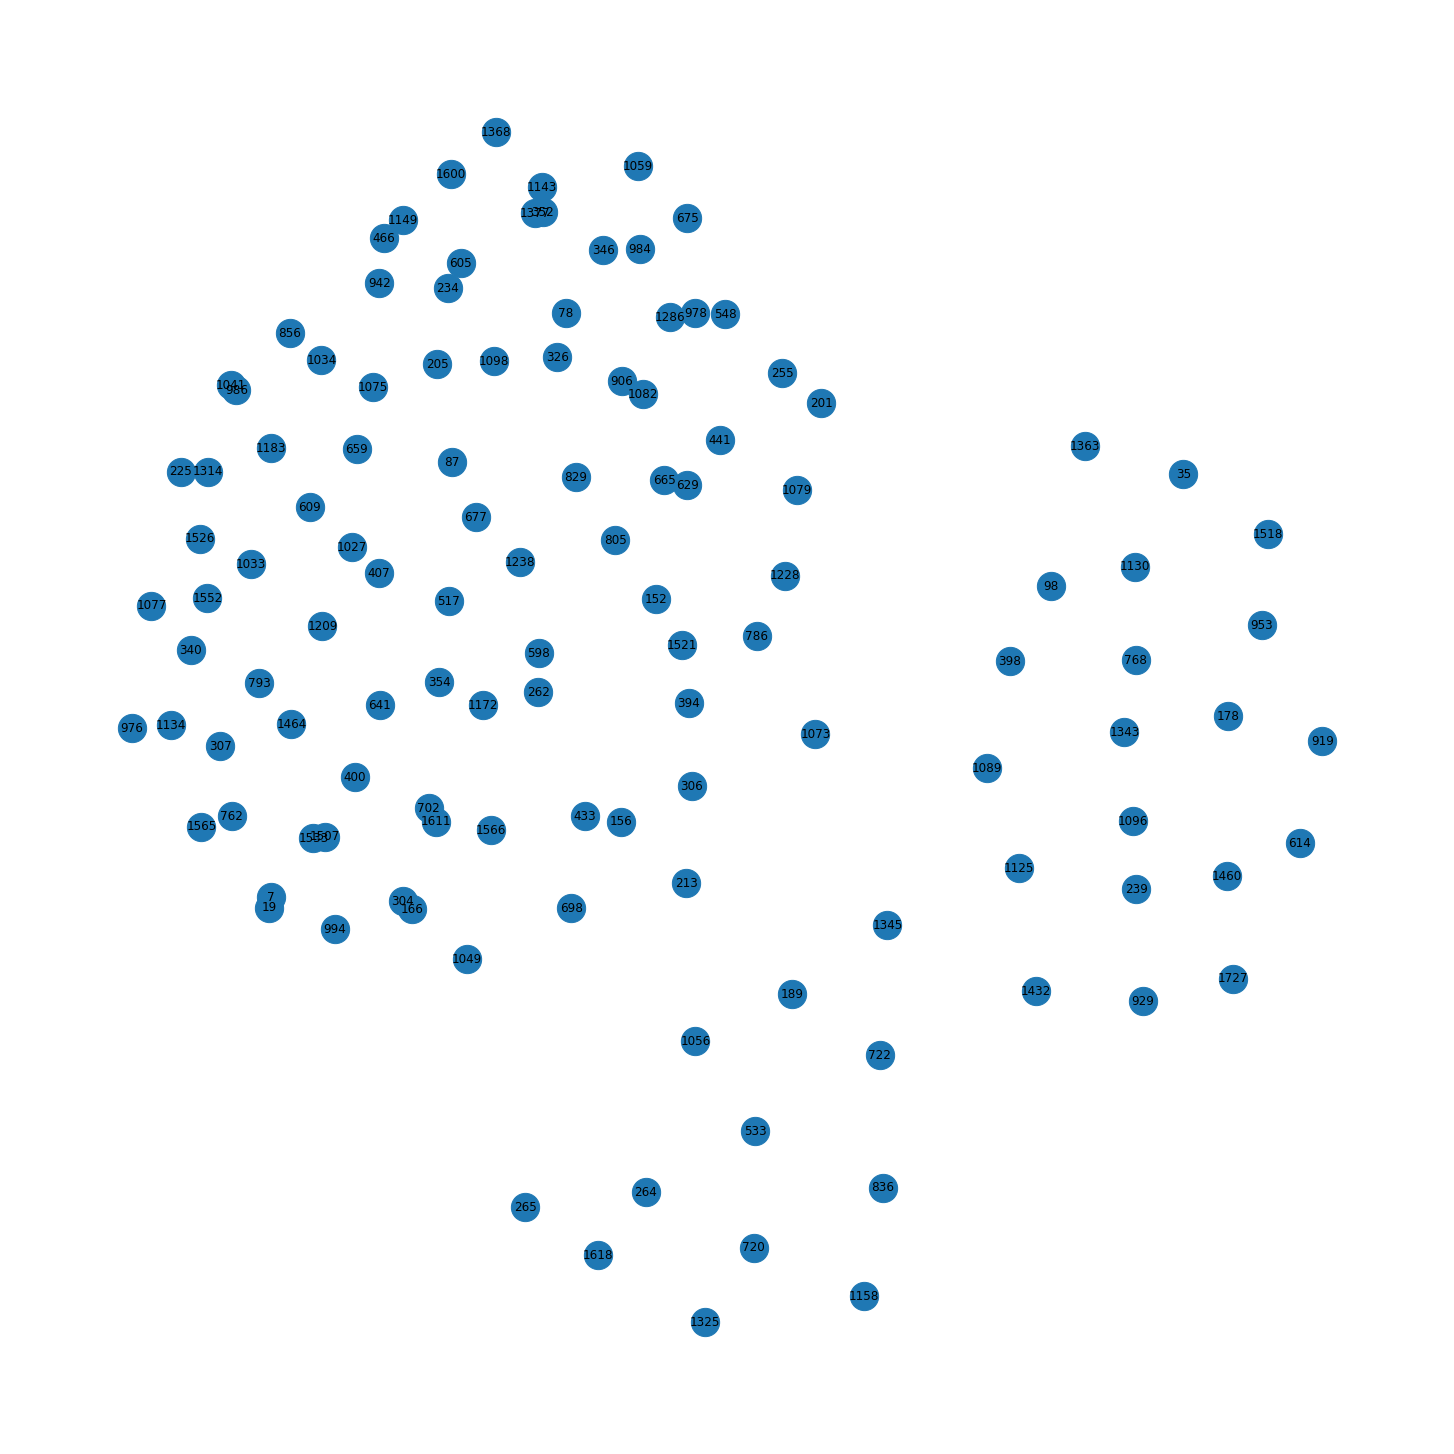

In [12]:
plt.figure(3,figsize=(20,20))
nx.draw(G,pos, width=0, with_labels=True,node_size=800,font_size=12)
plt.show()

C:\Users\tonyyyyy\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


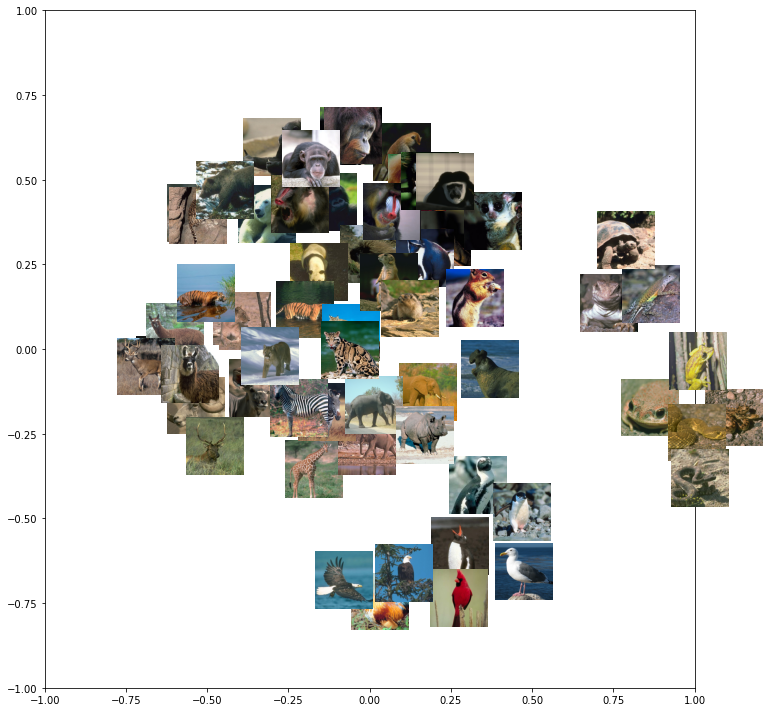

In [13]:
k = list(data.keys())
random.shuffle(k)

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
im = tmp # insert local path of the image.
fig, ax = plt.subplots()
ax.plot()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
for i in range(60):
    j = k[i]
    tmp = np.array(data[j])
    coor = pos[str(j)]
    coor = list((coor + 1)/2)
    coor.extend([0.08,0.08])
    newax = fig.add_axes(coor)
    newax.imshow(tmp)
    newax.axis('off')
plt.show()

In [14]:
df = pd.DataFrame(columns = name,index=name,data=OrigSimMat)
corr_data = []
for i in range(0,120):
    for j in range(0,i):
        index = df.index[i]
        col = df.columns[j]
        tmp = [index,col,df[index][col]]
        corr_data.append(tmp)

In [15]:
build_graph_for_all()

pos = nx.spring_layout(G,weight='weight')

C:\Users\tonyyyyy\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


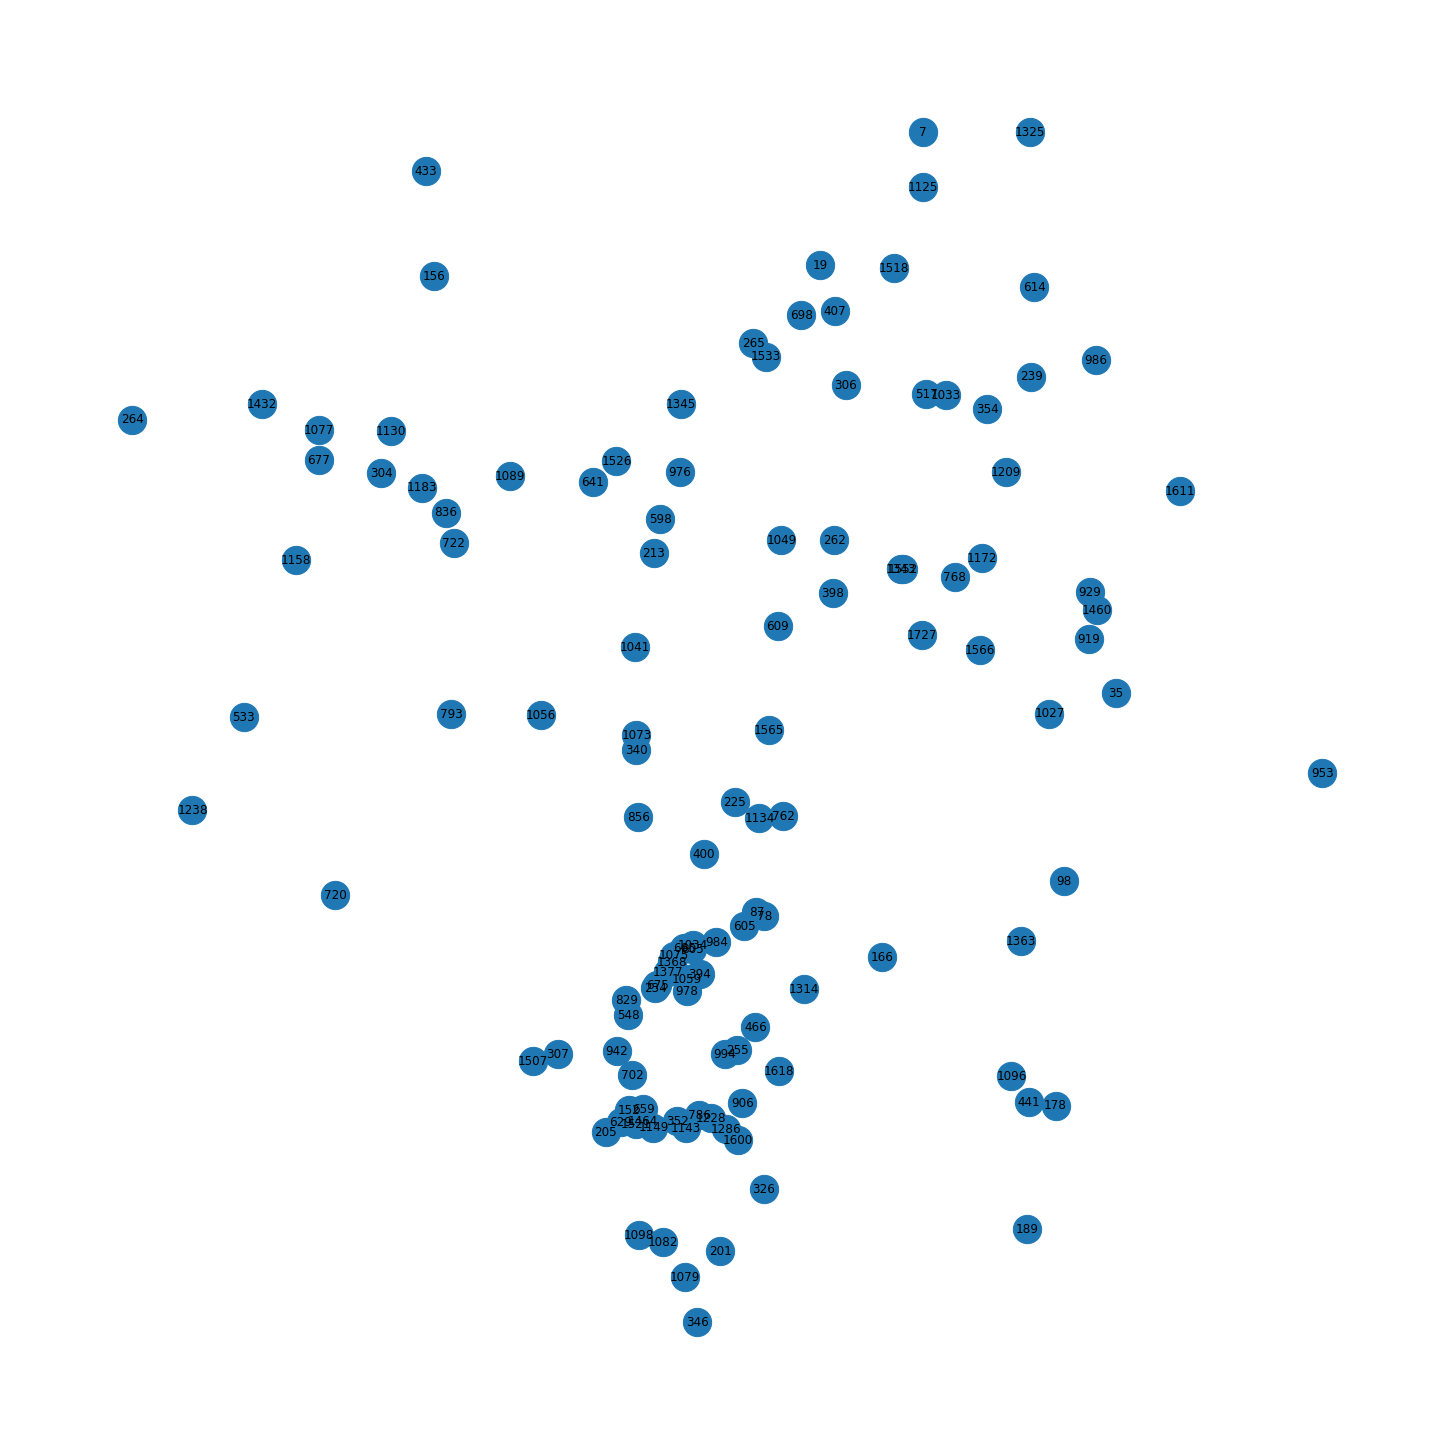

In [16]:
plt.figure(3,figsize=(20,20))
nx.draw(G,pos, width=0, with_labels=True,node_size=800,font_size=12)
plt.show()

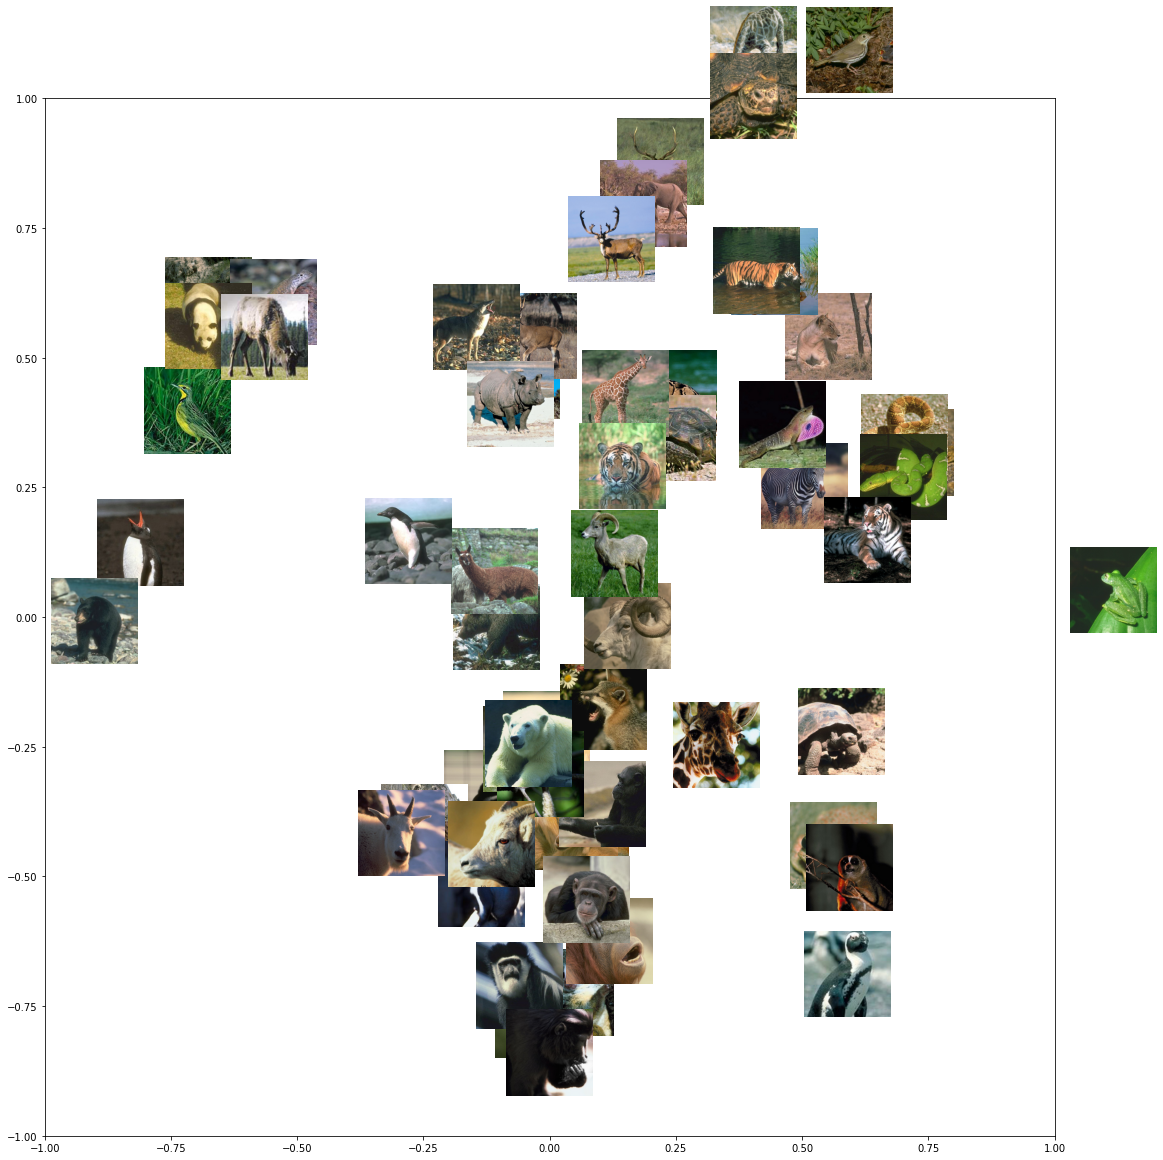

In [17]:
k = list(data.keys())

import random
random.shuffle(k)

plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True
im = tmp # insert local path of the image.
fig, ax = plt.subplots()
ax.plot()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

for i in range(60):
    j = k[i]
    tmp = np.array(data[j])
    coor = pos[str(j)]
    coor = list((coor + 1)/2)
    coor.extend([0.08,0.08])
    newax = fig.add_axes(coor)
    newax.imshow(tmp)
    newax.axis('off')
plt.show()

In [18]:
plt.show()

In [19]:
humanSimMat = humMat.reshape(120,120)
uniMat=[]               # For considering only the unique entries since it is a symmetric matrix
for i in range(120):
  for j in range(i,120):
    uniMat.append(humanSimMat[i,j])

uniMat=np.asarray(uniMat)

print(uniMat.shape)

(7260,)


In [20]:
inp = []
for i in range(120):
  for j in range(i,120):
    inp.append(F[i]*F[j])

inp = np.asarray(inp)
print(inp.shape )

inp2 = []
for i in range(120):
  for j in range(120):
    inp2.append(F[i]*F[j])

inp2 = np.asarray(inp2)
print(inp2.shape )

(7260, 4096)
(14400, 4096)


In [21]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=100, fit_intercept=False)

reg.fit(inp, uniMat)

Ridge(alpha=100, fit_intercept=False)

In [22]:
inp.shape

(7260, 4096)

In [23]:
humMat.shape

(120, 120)

In [24]:

PredSimMat = reg.predict(inp2)

cor_mat = np.corrcoef(PredSimMat, humMat.reshape((14400,)))
r = cor_mat[0,1]

r2 = r**2
print(r2)

0.825109443742929


In [25]:
PredSimMat = PredSimMat.reshape(120,120)

In [26]:
df = pd.DataFrame(columns=name, index=name, data=PredSimMat)
corr_data = []
for i in range(0, 120):
    for j in range(0, i):
        index = df.index[i]
        col = df.columns[j]
        tmp = [index, col, df[index][col]]
        corr_data.append(tmp)
G = nx.Graph()

existing_edges = {}


def build_graph(w, lev):
    if (lev > 5):
        return
    for z in corr_data:
        ind = -1
        if z[0] == w:
            ind = 0
            ind1 = 1
        if z[1] == w:
            ind == 1
            ind1 = 0
        if ind == 0 or ind == 1:
            if str(w) + "_" + str(corr_data[ind1]) not in existing_edges:
                G.add_node(str(corr_data[ind]))
                existing_edges[str(w) + "_" + str(corr_data[ind1])] = 1;
                G.add_edge(w, str(corr_data[ind1]))
                build_graph(corr_data[ind1], lev + 1)


existing_nodes = {}


def build_graph_for_all():
    count = 0
    for d in corr_data:
        # if (count > 40) :
        #     return
        if d[0] not in existing_edges:
            G.add_node(str(d[0]))
        if d[1] not in existing_edges:
            G.add_node(str(d[1]))
        G.add_weighted_edges_from([[str(d[0]), str(d[1]), d[2]]])
        count = count + 1


build_graph_for_all()

pos = nx.spring_layout(G, weight='weight')

C:\Users\tonyyyyy\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


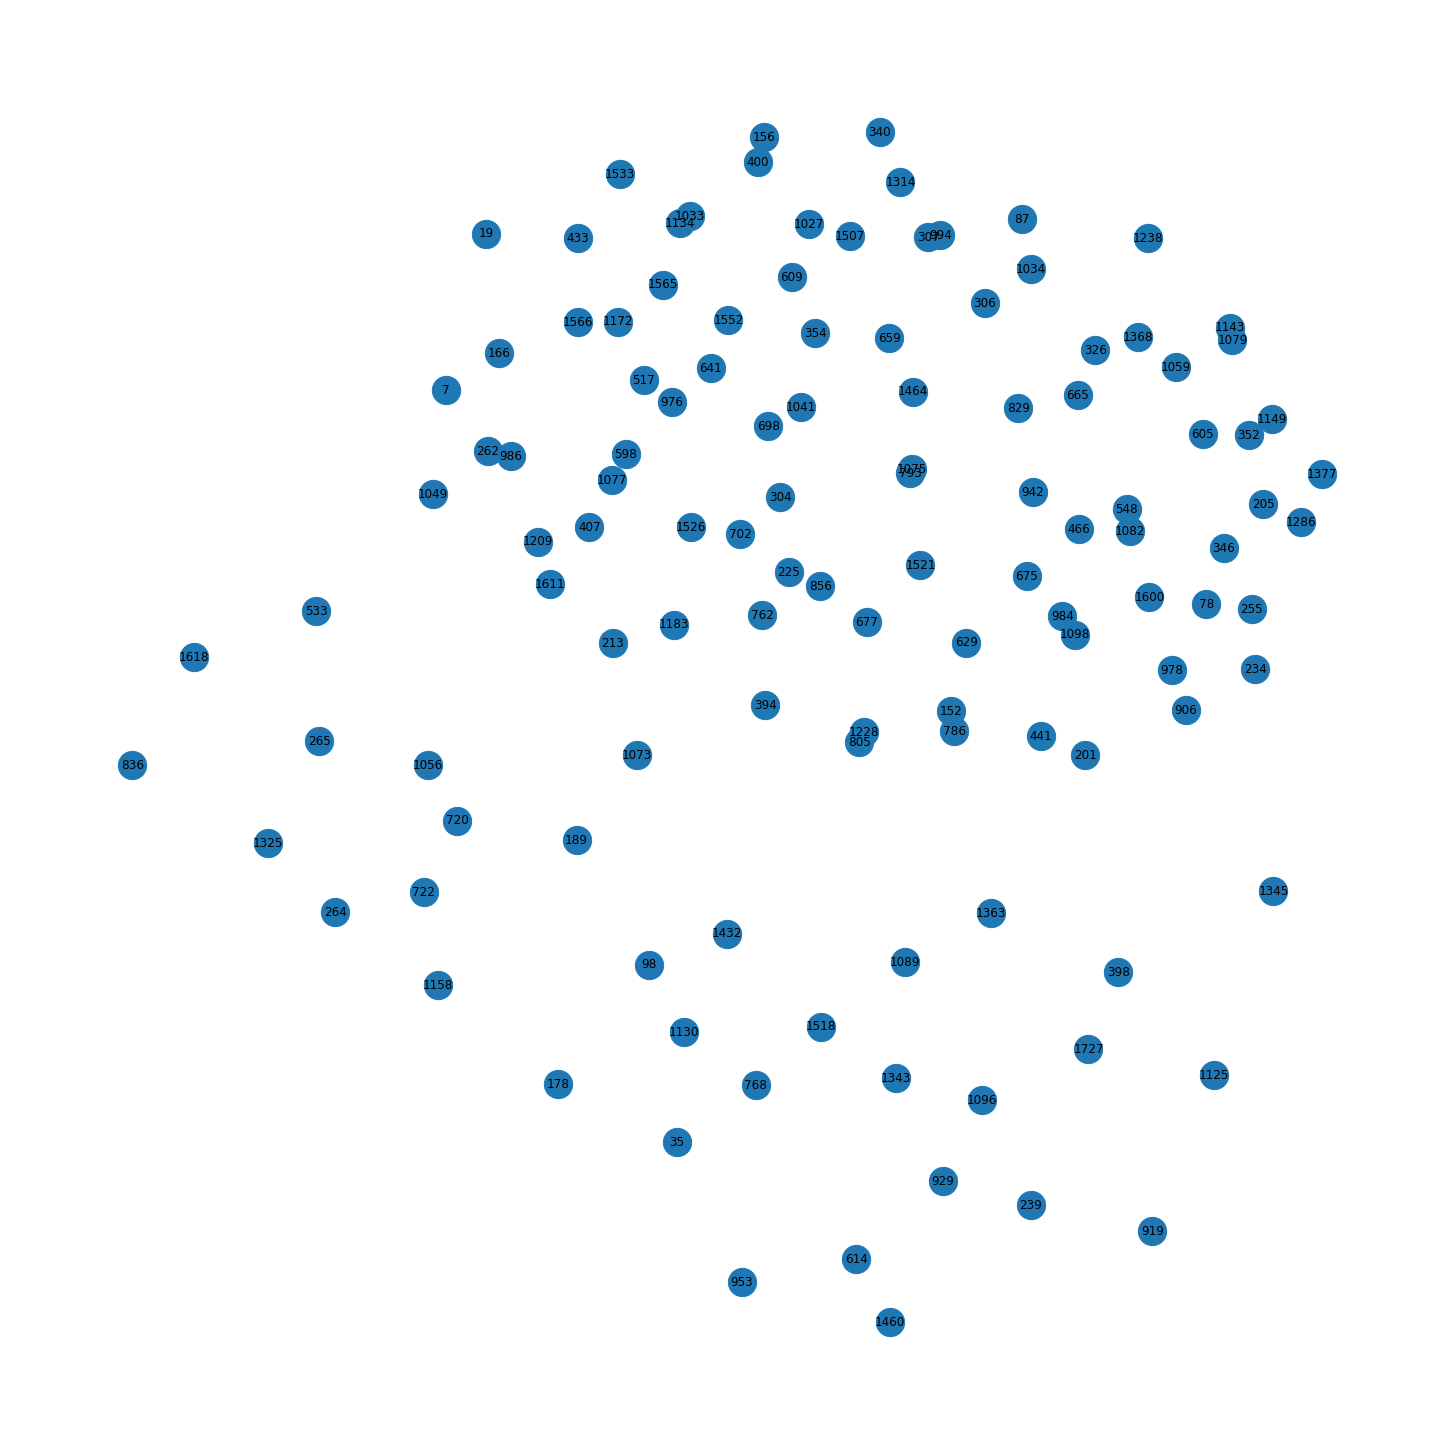

In [27]:
plt.figure(3,figsize=(20,20))
nx.draw(G,pos, width=0, with_labels=True,node_size=800,font_size=12)
plt.show()

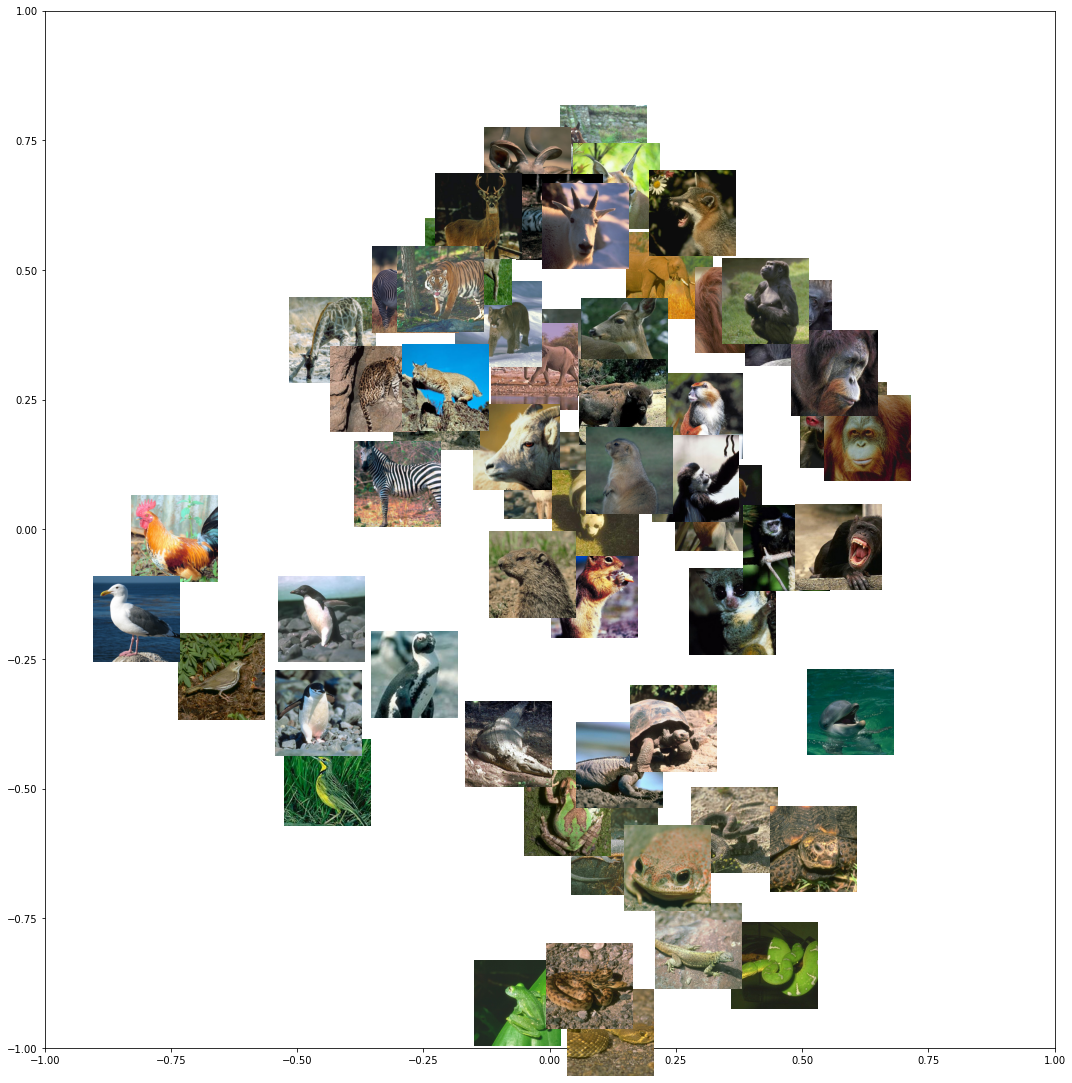

In [28]:
k = list(data.keys())

import random
random.shuffle(k)

plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True
im = tmp # insert local path of the image.
fig, ax = plt.subplots()
ax.plot()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

for i in range(60):
    j = k[i]
    tmp = np.array(data[j])
    coor = pos[str(j)]
    coor = list((coor + 1)/2)
    coor.extend([0.08,0.08])
    newax = fig.add_axes(coor)
    newax.imshow(tmp)
    newax.axis('off')
plt.show()